# Introduction to ANOVA and Sensitivity Analysis

## Goal
This notebook illustrates ANOVA use and Sensitivity Analysis with OpenTURNS.

It also describes a dataset of EM signatures which can be used to train and compare different metamodels

## Import modules and data

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


We start by importing data, they are stocked in a .csv file with a ; separator - data are already normalized.
**2 options, choose the good one**

**To read files from google colab**



In [4]:
url_name='https://raw.githubusercontent.com/dbetteb/early-ML/master/08_CAS_TEST_SER/data_scaled.csv'
xy_tot = pd.read_csv(url_name, header=0,sep=';')

**If you are on your computer**

In [5]:
file_name="data_scaled.csv"
xy_tot=pd.read_csv(file_name,header=0,sep=';')
xy_tot.describe()

FileNotFoundError: [Errno 2] No such file or directory: 'data_scaled.csv'

Visualization

In [6]:
print(xy_tot)

       Logive      Rnez    Lfente    Pfente    Dengin       LBB       Pos  \
0    0.495338  0.000000  0.497895  0.500335  0.498257  0.501992  0.000000   
1    0.839713  0.797224  0.544219  0.117688  0.386605  0.936888  0.859441   
2    0.718764  0.462412  0.122786  0.000000  0.148126  0.284999  0.572958   
3    0.232614  0.964583  0.208857  0.493698  0.087776  0.514571  0.915970   
4    0.328525  0.360263  0.771815  0.737518  0.032510  0.805642  0.444953   
..        ...       ...       ...       ...       ...       ...       ...   
106  0.893357  0.616894  0.666424  0.040633  0.112727  0.749508  0.408983   
107  0.954314  0.544326  0.619205  0.588434  0.649281  0.113298  0.877323   
108  0.673615  0.753639  0.953679  0.019827  0.826220  0.468277  0.894760   
109  0.655463  0.940585  0.931341  0.540705  0.040912  0.268522  0.286047   
110  0.018758  0.603489  0.405507  0.007256  0.637778  0.919163  0.230755   

     Fleche_BA  Fleche_BF     Corde         H         y  
0     0.503145   

Data shape

In [7]:
xy_tot.shape

(111, 12)

## ANOVA

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [11]:
results = ols('y ~ Logive+Rnez+Lfente+Pfente+Dengin+LBB+Pos+Fleche_BA+Fleche_BF+Corde+H', data=xy_tot).fit()

In [12]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Logive,3.764760,1.0,63.855565,2.509619e-12
Rnez,0.060988,1.0,1.034434,3.115987e-01
Lfente,0.020915,1.0,0.354749,5.527961e-01
Pfente,0.009864,1.0,0.167303,6.834035e-01
Dengin,0.485694,1.0,8.238044,5.016189e-03
LBB,51.942016,1.0,881.008801,4.402781e-51
Pos,0.669155,1.0,11.349801,1.076363e-03
Fleche_BA,6.925141,1.0,117.460019,1.640449e-18
Fleche_BF,0.772318,1.0,13.099585,4.674633e-04
Corde,10.236574,1.0,173.626527,1.666877e-23


## Sensitivity Analysis

We are going to use OpenTURNS and the 3 first PCA components

For Colab

In [13]:
!pip install openturns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.4 MB/s eta 0:00:00


In [14]:
import openturns as ot
import openturns.viewer as otv

In [22]:
#To read files from google colab
url_name='https://raw.githubusercontent.com/dbetteb/early-ML/master/08_CAS_TEST_SER/data_scaled2.csv'
xy_tot = pd.read_csv(url_name, header=0,sep=';')
xy_tot.describe()

,Logive,Rnez,Lfente,Pfente,Dengin,LBB,Pos,Fleche_BA,Fleche_BF,Corde,H,y1,y2,y3
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,1.110000e+02,1.110000e+02,1.110000e+02
mean,0.497335,0.499360,0.498114,0.500438,0.497902,0.502162,0.496423,0.503372,0.500216,0.500145,0.503438,2.240450e-16,6.141234e-16,1.000201e-16
std,0.291364,0.294132,0.291572,0.290533,0.293118,0.290416,0.292513,0.290781,0.293343,0.290855,0.290823,1.469217e+01,1.172201e+01,3.007738e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.151231e+01,-2.468260e+01,-5.644749e+00
25%,0.249340,0.248046,0.251255,0.254569,0.245518,0.259067,0.244946,0.257116,0.250675,0.255086,0.258540,-1.085429e+01,-8.704975e+00,-2.317673e+00
50%,0.495338,0.501609,0.497895,0.500335,0.498257,0.501992,0.497005,0.503145,0.500258,0.500010,0.504185,2.812443e-01,-2.277762e-01,7.869673e-02
75%,0.742680,0.750742,0.749488,0.748856,0.749841,0.745628,0.745938,0.750699,0.751053,0.744964,0.751018,1.167499e+01,9.396469e+00,2.829186e+00
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.857436e+01,2.597075e+01,7.005887e+00


In [ ]:
#from local file
file_name="data_scaled2.csv"
xy_tot=pd.read_csv(file_name,header=0,sep=';')
xy_tot.describe()

We extract the 3 outputs, that is to say the values associated to the 3 first components of PCA

In [23]:
print(xy_tot.columns)
y_tot = pd.concat([xy_tot.pop(x) for x in ['y1', 'y2','y3']], axis=1)
y_tot

Index(['Logive', 'Rnez', 'Lfente', 'Pfente', 'Dengin', 'LBB', 'Pos',
       'Fleche_BA', 'Fleche_BF', 'Corde', 'H', 'y1', 'y2', 'y3'],
      dtype='object')


,y1,y2,y3
0,15.082215,-5.248569,0.048376
1,14.428133,17.671144,1.892574
2,13.639695,-23.445469,1.156799
3,-14.621491,0.000358,4.929759
4,15.061054,1.235525,4.753541
...,...,...,...
106,4.654538,7.894375,5.374924
107,-5.866806,-13.270626,-2.350050
108,-10.408305,8.893657,-2.098407
109,-4.366241,-12.467366,4.576693


We build the training data following a uniform distribution and assuming all input data are independent. All input data are normalized between 0 and 1.

In [24]:
distribution = ot.ComposedDistribution([ot.Uniform(0.0, 1.0)] * 11)
dimension = distribution.getDimension()
distribution.setDescription(["Logive", "Rnez", "Lfente", "Pfente", "Dengin", "LBB", "Pos","Fleche_BA", "Fleche_BF", "Corde", "H"])

In [25]:
ot.RandomGenerator.SetSeed(0)
size = 10000
inputDesign = ot.SobolIndicesExperiment(distribution, size, False).generate()
inputDesign.getSize()

130000

**Description cf OpenTURNS website** : Sensitivity algorithms rely on the definition of specific designs. The method generates designs that can be used for Saltelli, Jansen, Martinez and MauntzKucherenko methods. This precomputes such input designs using distribution or experiment by generating a MC sample of twice the dimension by duplicating the distribution into a 2d distribution with repeated marginals, in order to also work with non-iid samples such as those generated by LHSExperiment or LowDiscrepancyExperiment. The sampling is done according to the given experiment, then it is split into samples A and B and the columns of these ones are mixed to define the huge sample (design). If computeSecondOrder is set to False, the result design is of size N(d+2) where d is the dimension of the distribution. If computeSecondOrder is set to True, the design size is N(2d+2).


=> Inputs for pick and freeze

We are going to use a metamodel to estimate the values at all sampling points - here a linear metamodel **with interactions**

In [26]:
import sklearn.linear_model as lm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [27]:
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
poly_inter=Pipeline([
             ('poly',interaction),
             ('regressor',lm.LinearRegression())])



**We consider a linear metamodel with interactions for each component**

In [28]:
poly_inter.fit(xy_tot, y_tot)

Pipeline(steps=[('poly',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('regressor', LinearRegression())])

We assert the prediction quality

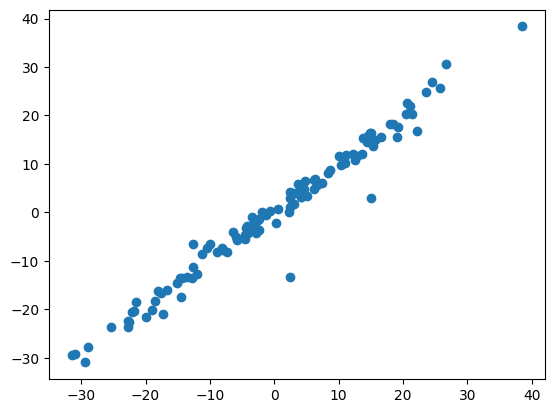

In [29]:
import matplotlib.pyplot as plt
plt.plot(y_tot['y1'],poly_inter.predict(xy_tot)[:,0],'o')

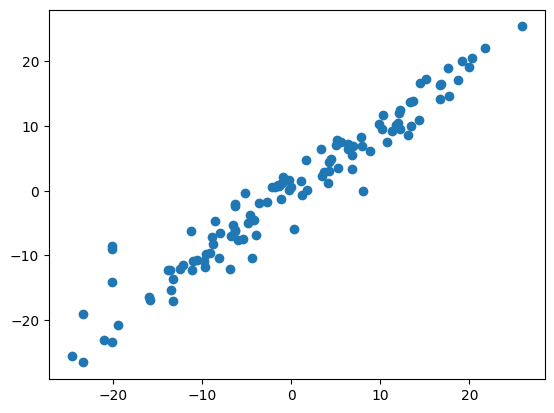

In [30]:
plt.plot(y_tot['y2'],poly_inter.predict(xy_tot)[:,1],'o')

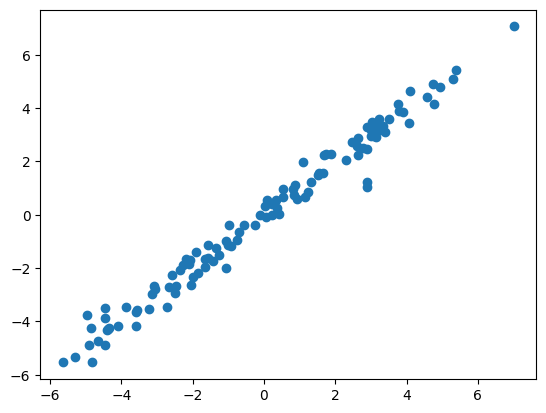

In [31]:
plt.plot(y_tot['y3'],poly_inter.predict(xy_tot)[:,2],'o')

In [32]:
poly_inter.score(xy_tot,y_tot)

0.9634662718960828

**We calculate the predictions for all sampling points**

In [33]:
outputDesign=np.zeros((np.shape(inputDesign)[0],3))
outputDesign = poly_inter.predict(inputDesign)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [34]:
outputDesign1=ot.Sample(outputDesign)

**We estimate principal and total sensitivity indices with associated confidence intervals using Martinez method, for the 1st component**

In [35]:
sensitivityAnalysis = ot.MartinezSensitivityAlgorithm(inputDesign, outputDesign1.getMarginal([0]), size)
first_indice = sensitivityAnalysis.getFirstOrderIndices()
total_indice = sensitivityAnalysis.getTotalOrderIndices()
first_indiceIC = sensitivityAnalysis.getFirstOrderIndicesInterval()
total_indiceIC = sensitivityAnalysis.getTotalOrderIndicesInterval()

In [36]:
print(first_indice)
print(total_indice)
print(first_indiceIC)
print(total_indiceIC)

[0.022531,-0.014248,-0.0140205,-0.0133593,-0.0112318,0.473554,-0.00514327,0.053375,-0.00422653,0.0730302,0.261011]#11
[0.0447973,0.0156877,0.00125672,0.00597272,0.00910463,0.491434,0.0130709,0.0731795,0.0187353,0.102983,0.282423]#11
[-0.000233452, 0.0461605]
[-0.0367245, 0.00939048]
[-0.0367918, 0.00911211]
[-0.035165, 0.00948617]
[-0.0339717, 0.0121772]
[0.458676, 0.486185]
[-0.0286338, 0.0180825]
[0.0299223, 0.0753763]
[-0.0279425, 0.0196564]
[0.0484278, 0.0971254]
[0.239584, 0.281736]
[0.0128929, 0.075024]
[-0.0159514, 0.0452715]
[-0.0298046, 0.0304058]
[-0.0251899, 0.0352313]
[-0.0223945, 0.0387036]
[0.450296, 0.53096]
[-0.018276, 0.0426964]
[0.0395589, 0.103404]
[-0.0126653, 0.048192]
[0.0692628, 0.134671]
[0.243399, 0.31973]


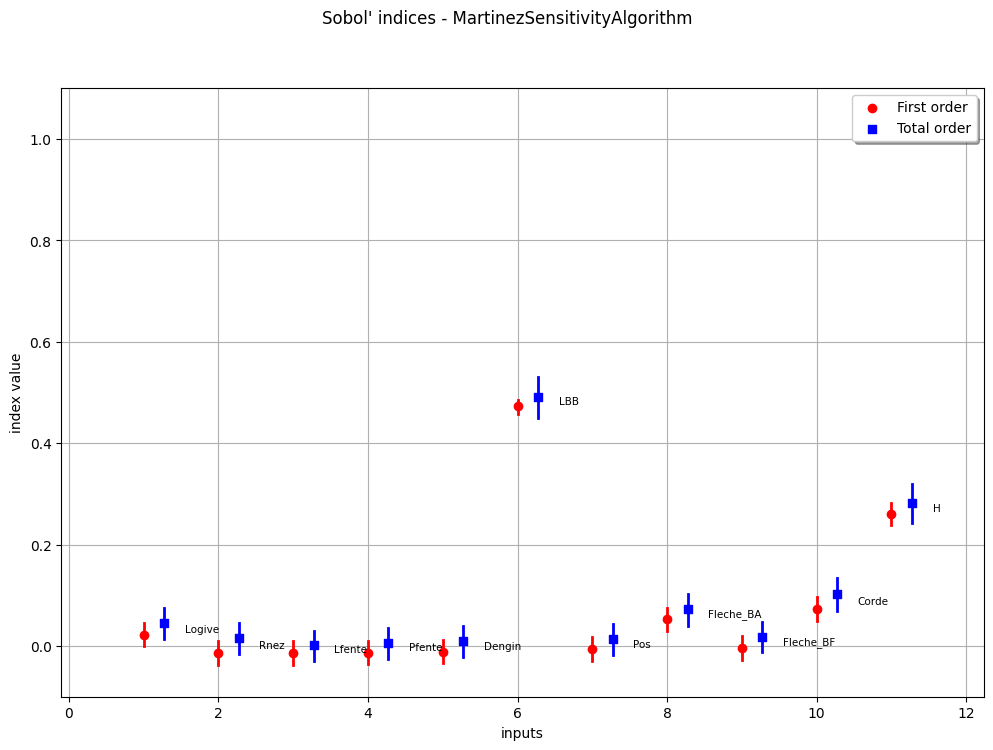

In [37]:
otv.View(sensitivityAnalysis.draw(), (1200, 800))

Analysis component by component

In [38]:
for j in range(1,3):
    sensitivityAnalysisb = ot.MartinezSensitivityAlgorithm(inputDesign, outputDesign1.getMarginal([j]), size)
    bb = sensitivityAnalysisb.getFirstOrderIndices()
    tt = sensitivityAnalysisb.getTotalOrderIndices()
    first_indice=np.vstack((first_indice,bb))
    total_indice=np.vstack((total_indice,tt))


Figures

In [39]:
variables = ["Logive", "Rnez", "Lfente", "Pfente", "Dengin", "LBB", "Pos","Fleche_BA", "Fleche_BF", "Corde", "H"]
xxx = np.arange(len(variables))  # the label locations
width = 0.2  # the width of the bars


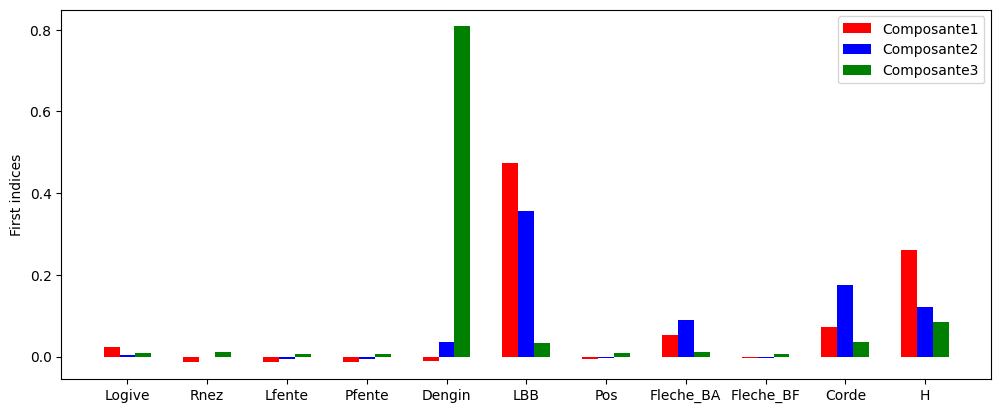

In [40]:
fig, ax = plt.subplots()
fig.set_figwidth(12)
rects1 = ax.bar(xxx - width, first_indice[0,:], width, color='red',label='Composante1')
rects2 = ax.bar(xxx , first_indice[1,:], width, color='blue',label='Composante2')
rects3 = ax.bar(xxx + width, first_indice[2,:], width, color='green',label='Composante3')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('First indices')
ax.set_xticks(xxx)
ax.set_xticklabels(variables)
ax.legend()

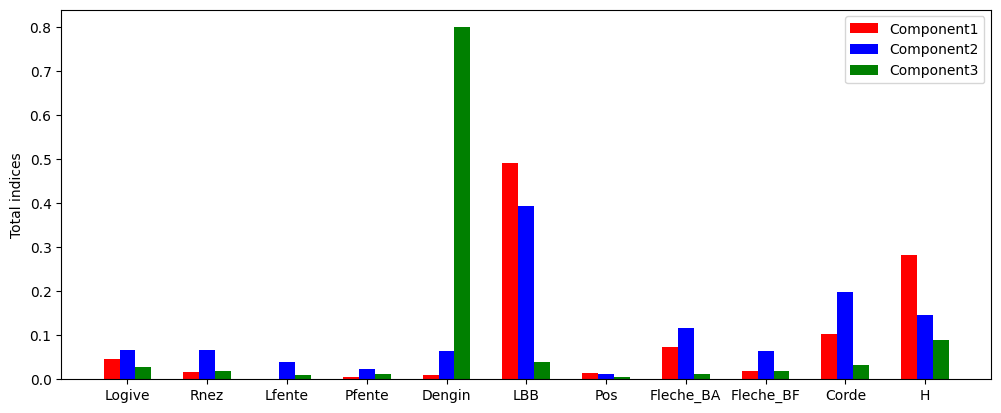

In [41]:
fig, ax = plt.subplots()
fig.set_figwidth(12)
rects1 = ax.bar(xxx - width, total_indice[0,:], width, color='red',label='Component1')
rects2 = ax.bar(xxx , total_indice[1,:], width, color='blue',label='Component2')
rects3 = ax.bar(xxx + width, total_indice[2,:], width, color='green',label='Component3')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total indices')
ax.set_xticks(xxx)
ax.set_xticklabels(variables)
ax.legend()

**HSIC indices**


Here we need less points and we can use directly xy_tot (but you can also try to use the metamodel, as an exercice).
We start by building a LHS made of 200 points




In [42]:
nexp=200
#initial LHS
lhs = ot.LHSExperiment(distribution, nexp, False, False)

planexp = lhs.generate()

In order to estimate HSIC indices, we must choose a kernel, here a Squared Exponential one

In [43]:
xy_totHSIC=ot.Sample(np.array(xy_tot))

We estimate the associated standard deviation, for each coordinate

In [44]:
covarianceModelCollection = []
for i in range(xy_tot.shape[1]):
    Xi = xy_totHSIC.getMarginal(i)
    Cov = ot.SquaredExponential(1)
    Cov.setScale(Xi.computeStandardDeviation())
    covarianceModelCollection.append(Cov)



In [45]:
outputHSIC=ot.Sample(np.array(y_tot))


We also need to choose a kernel for the output - we then estimate the HSIC indices and the associated p-values for each of the 3 output components



In [46]:
covarianceModelCollection.append(ot.SquaredExponential(outputHSIC[:,0].computeStandardDeviation()))
estimatorType = ot.HSICUStat() # could be HSICVStat instead if enough sample
hsic = ot.HSICEstimatorGlobalSensitivity(covarianceModelCollection, xy_totHSIC, outputHSIC[:,0], estimatorType)

resu_indices=np.zeros((xy_tot.shape[1],6))
resu_indices[:,0]=hsic.getR2HSICIndices()
resu_indices[:,1]=np.array(hsic.getPValuesPermutation())

covarianceModelCollection.pop(-1)
covarianceModelCollection.append(ot.SquaredExponential(outputHSIC[:,1].computeStandardDeviation()))
hsic = ot.HSICEstimatorGlobalSensitivity(covarianceModelCollection, xy_totHSIC, outputHSIC[:,1], estimatorType)
resu_indices[:,2]=hsic.getR2HSICIndices()
resu_indices[:,3]=np.array(hsic.getPValuesPermutation())

covarianceModelCollection.pop(-1)
covarianceModelCollection.append(ot.SquaredExponential(outputHSIC[:,2].computeStandardDeviation()))
hsic = ot.HSICEstimatorGlobalSensitivity(covarianceModelCollection, xy_totHSIC, outputHSIC[:,2], estimatorType)
resu_indices[:,4]=hsic.getR2HSICIndices()
resu_indices[:,5]=np.array(hsic.getPValuesPermutation())



Let's have a look at the indices - the sensitivity analysis is made mostly on the p-value, the variable is influential when it is **small**

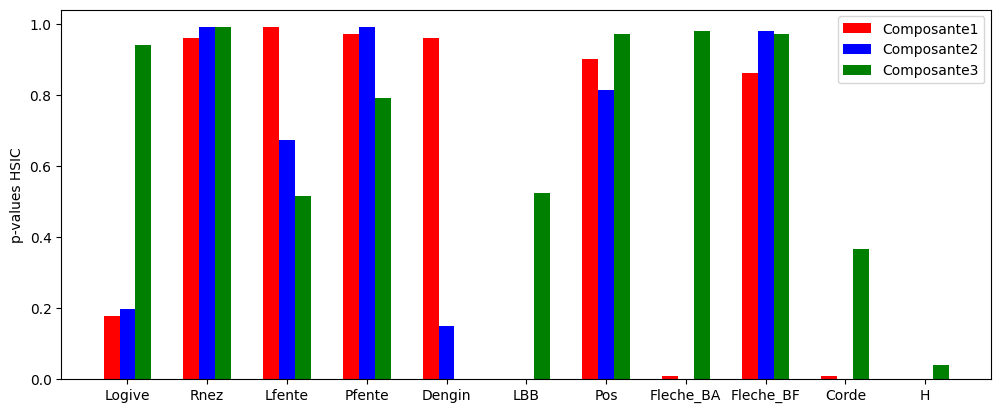

In [47]:
fig, ax = plt.subplots()
fig.set_figwidth(12)
rects1 = ax.bar(xxx - width, resu_indices[:,1], width, color='red',label='Composante1')
rects2 = ax.bar(xxx , resu_indices[:,3], width, color='blue',label='Composante2')
rects3 = ax.bar(xxx + width, resu_indices[:,5], width, color='green',label='Composante3')

ax.set_ylabel('p-values HSIC')
ax.set_xticks(xxx)
ax.set_xticklabels(variables)
ax.legend()

**Global multivariate analysis**

In [48]:
sensitivity_algorithm = ot.MartinezSensitivityAlgorithm(inputDesign, outputDesign1, size)

In [49]:
first_indiceag = sensitivity_algorithm.getAggregatedFirstOrderIndices()
total_indiceag = sensitivity_algorithm.getAggregatedTotalOrderIndices()
print(first_indiceag)
print(total_indiceag)

[0.0151212,-0.00854355,-0.0104087,-0.0103765,0.0269986,0.416756,-0.00412585,0.0667961,-0.0041967,0.112802,0.200923]#11
[0.052845,0.0354414,0.0161217,0.0124949,0.0498801,0.44153,0.0121907,0.088794,0.0367803,0.138965,0.223261]#11


Bootstrap estimation of confidence intervals

In [50]:
nr_bootstrap = 100
confidence_level = 0.95

sensitivity_algorithm.setBootstrapSize(nr_bootstrap)
sensitivity_algorithm.setConfidenceLevel(confidence_level)
sensitivity_algorithm.setUseAsymptoticDistribution(False)
interval_fo = sensitivity_algorithm.getFirstOrderIndicesInterval()
interval_to = sensitivity_algorithm.getTotalOrderIndicesInterval()
print("bootstrap intervals")
print("Aggregated first order indices interval = ", interval_fo)
print("Aggregated total order indices interval = ", interval_to)

bootstrap intervals
Aggregated first order indices interval =  [-6.75574e-06, 0.0324881]
[-0.0224172, 0.00794827]
[-0.0243561, 0.00589866]
[-0.0243305, 0.00696222]
[0.012243, 0.0445576]
[0.404372, 0.431733]
[-0.018464, 0.0124945]
[0.0519544, 0.0844279]
[-0.0195648, 0.0136559]
[0.0970381, 0.127683]
[0.187185, 0.216574]
Aggregated total order indices interval =  [0.0291398, 0.0735302]
[0.0121077, 0.0566874]
[-0.00685281, 0.0367193]
[-0.0105181, 0.0331008]
[0.0259581, 0.0708567]
[0.413277, 0.468568]
[-0.0108503, 0.0327981]
[0.0651616, 0.110149]
[0.0135046, 0.057845]
[0.113481, 0.162122]
[0.197076, 0.245903]


Plot

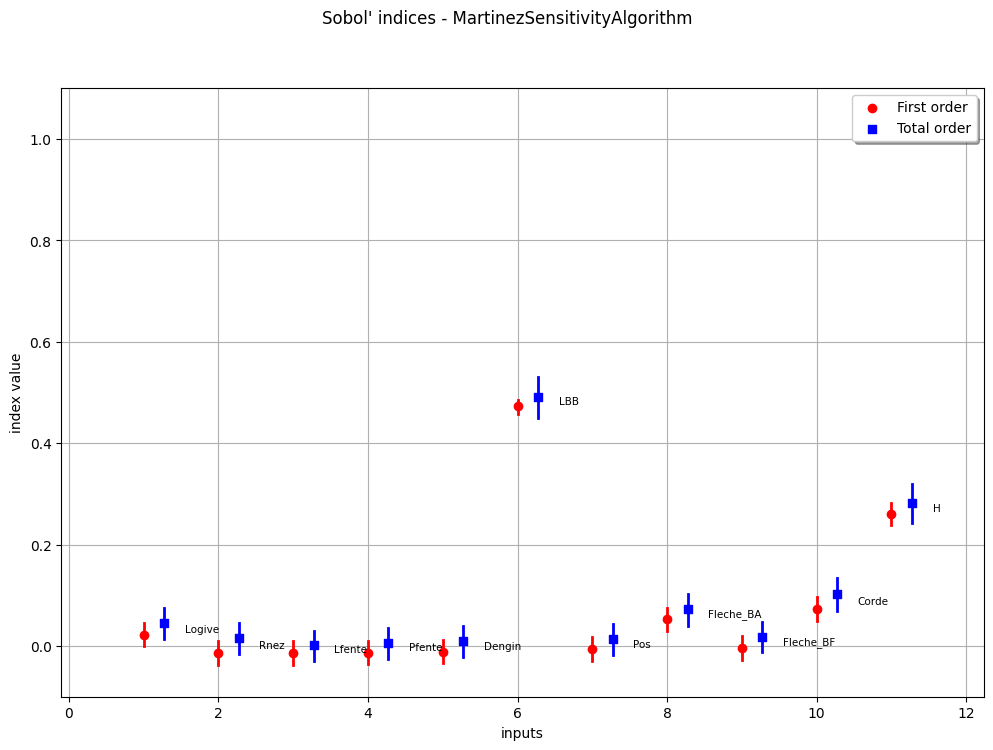

In [51]:
otv.View(sensitivityAnalysis.draw(), (1200, 800))